In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0)

In [59]:
# you dont need to standardise unless you use Euclidean  distance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)   # for the difference b/w fit_transform and transform, see: https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models/12346#12346

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [61]:
y_pred=classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred); cm

array([[62,  6],
       [ 3, 29]])

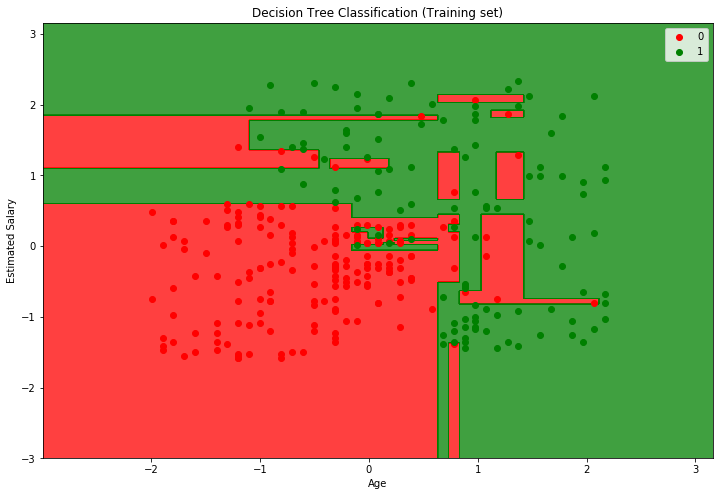

In [63]:
# vis training set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2= np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1,0.01 ),
                                     np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1,0.01 ))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                       c=ListedColormap(('red','green'))(i), label=j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

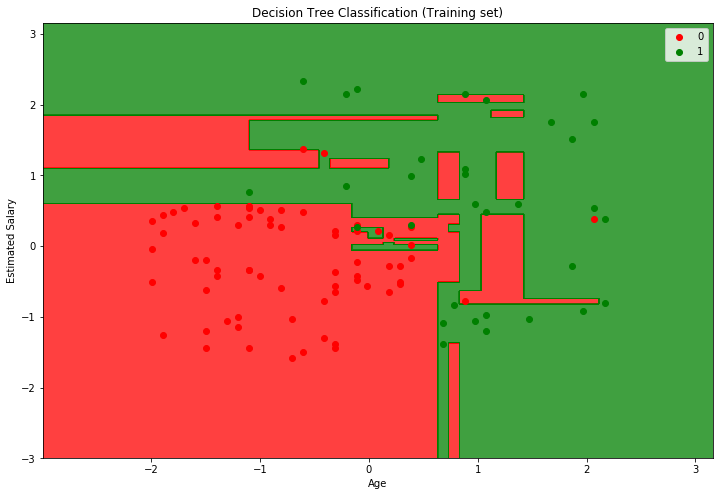

In [64]:
# vis test set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2= np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1,0.01 ),
                                     np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1,0.01 ))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                       c=ListedColormap(('red','green'))(i), label=j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()